In [ ]:
# Second example - slightly more complicated this time

In [1]:
# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('floats.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [2]:
# Ok, what does the data look like?

# Display for pretty tables
from IPython.display import display

print('Sample rows from the dataset (top and bottom five):')  # Spot checks
display(dataset.head(5))
display(dataset.tail(5))
print('\n')

Sample rows from the dataset (top and bottom five):


,callSign,Date_Time,JulianDay,Time_QC,Latitude,Longitude,Position_QC,Depth,Depth_QC,Temperature,Temperature_QC,Salinity,Salinity_QC
0,Q4901043,7/12/10,2455390.351,1,24.823,-87.964,1,2.0,1,29.83,1,36.59,1
1,Q4901043,7/12/10,2455390.351,1,24.823,-87.964,1,4.0,1,29.65,1,36.58,1
2,Q4901043,7/12/10,2455390.351,1,24.823,-87.964,1,6.0,1,29.53,1,36.58,1
3,Q4901043,7/12/10,2455390.351,1,24.823,-87.964,1,8.0,1,29.49,1,36.58,1
4,Q4901043,7/12/10,2455390.351,1,24.823,-87.964,1,10.0,1,29.46,1,36.58,1


,callSign,Date_Time,JulianDay,Time_QC,Latitude,Longitude,Position_QC,Depth,Depth_QC,Temperature,Temperature_QC,Salinity,Salinity_QC
10327,Q4901273,7/4/10,2455382.113,1,27.989,-89.813,1,495.0,1,8.59,1,35.02,1
10328,Q4901273,7/4/10,2455382.113,1,27.989,-89.813,1,544.0,1,7.81,1,34.95,1
10329,Q4901273,7/4/10,2455382.113,1,27.989,-89.813,1,594.0,1,7.36,1,34.92,1
10330,Q4901273,7/4/10,2455382.113,1,27.989,-89.813,1,668.0,1,6.73,1,34.90,1
10331,Q4901273,7/4/10,2455382.113,1,27.989,-89.813,1,742.0,1,6.60,1,34.90,1


In [3]:
# Let's look at a numerical summary table

print('Summary of the dataset - Univariate statistics')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - Univariate statistics


,callSign,Date_Time,JulianDay,Time_QC,Latitude,Longitude,Position_QC,Depth,Depth_QC,Temperature,Temperature_QC,Salinity,Salinity_QC
count,10021,10021,1.002100e+04,10021.0,10021.000000,10021.000000,10021.0,10021.000000,10021.0,10021.000000,10021.0,10021.000000,10021.000000
unique,11,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Q4901044,8/6/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2877,635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.455390e+06,1.0,26.993169,-86.772731,1.0,300.905399,1.0,16.273756,1.0,35.822074,1.000399
std,NaN,NaN,2.322667e+01,0.0,1.178793,1.274220,0.0,268.015655,0.0,7.876257,0.0,0.690964,0.028253
min,NaN,NaN,2.455341e+06,1.0,23.787000,-89.813000,1.0,2.000000,1.0,4.670000,1.0,28.750000,1.000000
25%,NaN,NaN,2.455373e+06,1.0,26.019000,-87.689000,1.0,77.000000,1.0,8.690000,1.0,35.030000,1.000000
50%,NaN,NaN,2.455391e+06,1.0,27.397000,-86.725000,1.0,214.000000,1.0,16.170000,1.0,36.070000,1.000000
75%,NaN,NaN,2.455410e+06,1.0,27.698000,-85.972000,1.0,492.000000,1.0,23.040000,1.0,36.460000,1.000000


In [4]:
# Let's set up a problem: Can we predict 'callSign' using these three features:  'Depth', 'Temperature', 'Salinity' ?

In [5]:
print('Reading list of problem variables X and Y...')
X_name = [ 'Depth', 'Temperature', 'Salinity' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'callSign'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [6]:
# Spot checks for X:

print('Sample rows from X (top and bottom):')
display(X.head(3))
display(X.tail(3))
print('\n')

print('Statistical summary of X:')
display(X.describe())
print('\n')

Sample rows from X (top and bottom):


,Depth,Temperature,Salinity
0,2.0,29.83,36.59
1,4.0,29.65,36.58
2,6.0,29.53,36.58


,Depth,Temperature,Salinity
10329,594.0,7.36,34.92
10330,668.0,6.73,34.90
10331,742.0,6.60,34.90




Statistical summary of X:


,Depth,Temperature,Salinity
count,10021.000000,10021.000000,10021.000000
mean,300.905399,16.273756,35.822074
std,268.015655,7.876257,0.690964
min,2.000000,4.670000,28.750000
25%,77.000000,8.690000,35.030000
50%,214.000000,16.170000,36.070000
75%,492.000000,23.040000,36.460000
max,996.000000,31.710000,36.900000


Summary of X - Univariate graphs

Histograms:


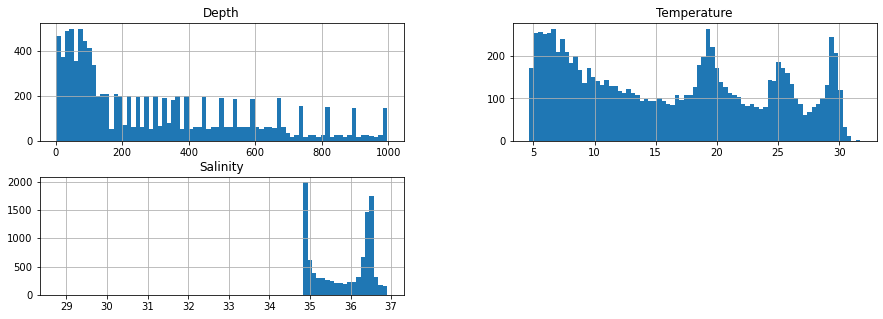

Box plots:


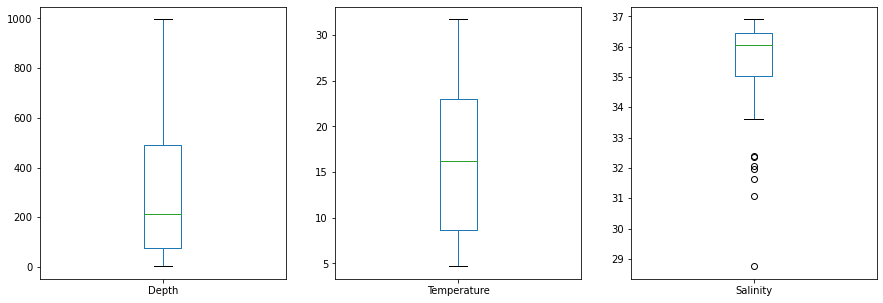

In [7]:
# Let's look at some graphical summaries

%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/

print('Summary of X - Univariate graphs')
print()

print('Histograms:')
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

print('Box plots:')
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

Summary of X - Bivariate (column-pair) graphs:
Correlation matrix:


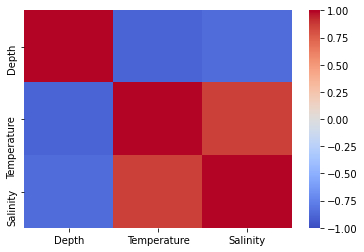

Scatter plots:


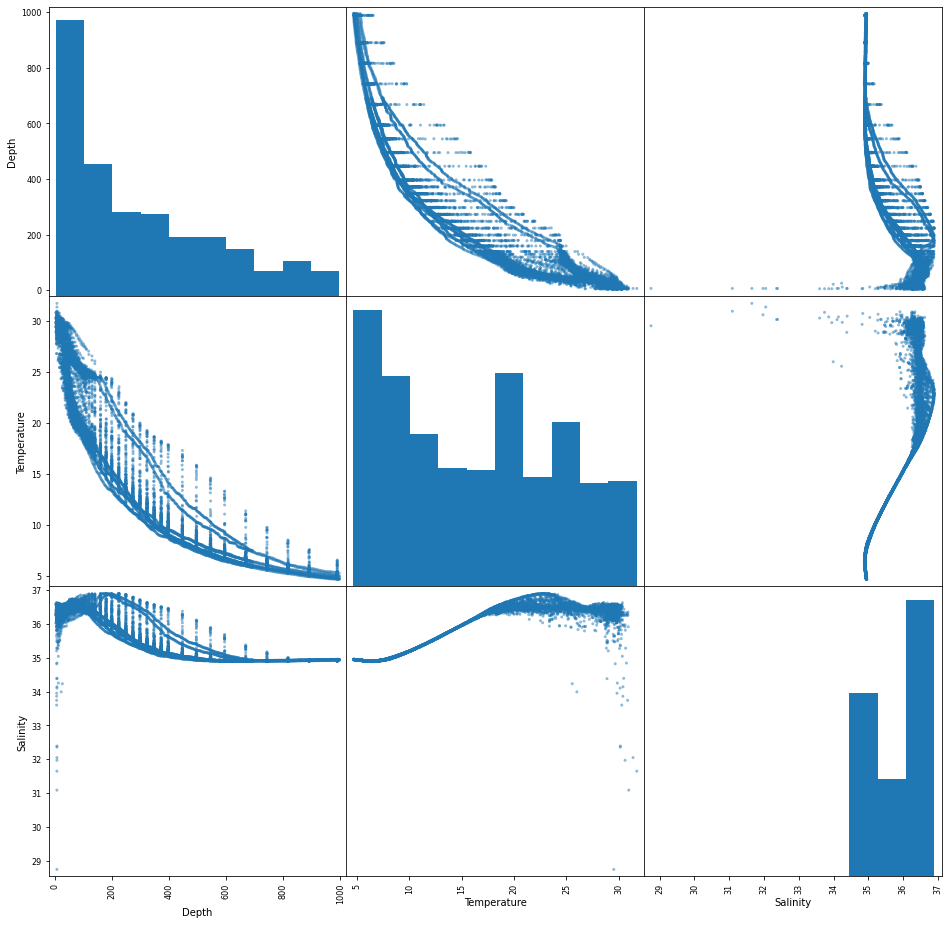

In [8]:
# More graphical summaries

import seaborn as sns   # https://seaborn.pydata.org/

print('Summary of X - Bivariate (column-pair) graphs:')

print('Correlation matrix:')
corr = X.corr()
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
pl.show()

print('Scatter plots:')
scatter_matrix(X, figsize=(16, 16))
pl.show()

In [9]:
# Spot checks for y:

print('Summary of y:')
display(y.value_counts())

Summary of y:


Q4901044    2877
Q4901269     945
Q4901270     945
Q4901266     938
Q4901267     880
Q4901265     855
Q4901043     822
Q4901268     682
Q4901272     540
Q4901271     495
Q4901273      42
Name: callSign, dtype: int64

In [10]:
# Time for ML

# Split data into training and testing datasets
from sklearn import model_selection

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


In [11]:
# Now train the model on the data 

# algorithms
from sklearn.linear_model import LogisticRegression

print('training model...')
modelName = LogisticRegression(solver='liblinear')
modelName.fit(X_train, y_train)  # train the model on the training data
print('done with training the model')

training model...
done with training the model


In [12]:
# How does the model do with predictions? 

# Let's compute its accuracy on the data we set aside.
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = modelName.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

computing accuracy...
Accuracy: 0.33266832917705735
